In [1]:
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from torchvision import transforms

pd.set_option('display.expand_frame_repr', False)

In [3]:
from zse.datamodules.components.leishmania_dataset import LeishmaniaDataset
from zse.utils.eval import QuantEval

In [4]:
home = "/p/fastdata/bigbrains/personal/crijnen1"
data_root = f"{home}/data"
zse_path = f"{home}/Z-Stack-Enhancement"
exp_path = f"{zse_path}/logs/experiments/runs/leishmania"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data_test = LeishmaniaDataset(f"{data_root}/COMI/Leishmania/Leishmania_blurred_test/*.jpg", imsize=512, transform=transforms.ToTensor())

In [12]:
t = 0.8
r = 3
dest = f"{zse_path}/notebooks/leishmania/quantitative_entropy_r{r}_{int(t*100)}.xlsx"
evaluator = QuantEval(dest, data_test, 3, device, 4, entropy_thresh=t, disk_size=r)

Adding 'Blurry Images': 'data' to results.


In [13]:
evaluator.add_model("gatys", "Gatys Style Transfer", f"{data_root}/COMI/Leishmania/predictions/gatys_style/*.jpg")
evaluator.add_model("comi", "COMI", f"{data_root}/COMI/Leishmania/predictions/comi_gan/*.jpg")
evaluator.add_model("adain", "AdaIN Baseline with Gram Loss", f"{exp_path}/adain/gram_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1/2022-11-26_02-29-24/checkpoints/epoch_088.ckpt")
evaluator.add_model("adain", "AdaIN Baseline with AdaIN Loss", f"{exp_path}/adain/adain_loss/lr:0.0005-style_weight:1.0-weight_decay:0-lr_decay:1/2022-11-26_01-28-34/checkpoints/epoch_079.ckpt")
evaluator.add_model("unet", "U17 Baseline with Gram Loss", f"{exp_path}/u17/gram_loss/lr:0.001-style_weight:10000.0-weight_decay:0-lr_decay:1/2022-11-27_16-35-35/checkpoints/epoch_036.ckpt")
evaluator.add_model("unet", "U17 Baseline with AdaIN Loss", f"{exp_path}/u17/adain_loss/lr:0.0001-style_weight:100.0-weight_decay:0-lr_decay:1/2022-11-27_15-42-58/checkpoints/epoch_092.ckpt")
evaluator.add_model("adain_unet", "AdaIN U-Net with Random Encoder", f"{zse_path}/models/leishmania_best.ckpt")
evaluator.add_model("adain_unet", "AdaIN U-Net with Gram Loss", f"{exp_path}/unet/gram_loss/lr:0.001-style_weight:1000000.0-weight_decay:0-lr_decay:1/2022-11-25_13-11-21/checkpoints/epoch_082.ckpt")
evaluator.add_model("adain_unet", "AdaIN U-Net with AdaIN Loss", f"{exp_path}/unet/adain_loss/lr:0.001-style_weight:100.0-weight_decay:0-lr_decay:1/2022-11-25_16-43-30/checkpoints/epoch_098.ckpt")
evaluator.results

Adding 'Gatys Style Transfer': 'gatys' to results.
Adding 'COMI': 'comi' to results.
Adding 'AdaIN Baseline with Gram Loss': 'adain' to results.
Adding 'AdaIN Baseline with AdaIN Loss': 'adain' to results.
Adding 'U17 Baseline with Gram Loss': 'unet' to results.
Adding 'U17 Baseline with AdaIN Loss': 'unet' to results.
Adding 'AdaIN U-Net with Random Encoder': 'adain_unet' to results.


/p/fastdata/bigbrains/personal/crijnen1/anaconda3/envs/dl/lib/python3.9/site-packages/pytorch_lightning/core/saving.py:263: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['val_fid.inception.Conv2d_1a_3x3.conv.weight', 'val_fid.inception.Conv2d_1a_3x3.bn.weight', 'val_fid.inception.Conv2d_1a_3x3.bn.bias', 'val_fid.inception.Conv2d_1a_3x3.bn.running_mean', 'val_fid.inception.Conv2d_1a_3x3.bn.running_var', 'val_fid.inception.Conv2d_2a_3x3.conv.weight', 'val_fid.inception.Conv2d_2a_3x3.bn.weight', 'val_fid.inception.Conv2d_2a_3x3.bn.bias', 'val_fid.inception.Conv2d_2a_3x3.bn.running_mean', 'val_fid.inception.Conv2d_2a_3x3.bn.running_var', 'val_fid.inception.Conv2d_2b_3x3.conv.weight', 'val_fid.inception.Conv2d_2b_3x3.bn.weight', 'val_fid.inception.Conv2d_2b_3x3.bn.bias', 'val_fid.inception.Conv2d_2b_3x3.bn.running_mean', 'val_fid.inception.Conv2d_2b_3x3.bn.running_var', 'val_fid.inception.Conv2d_3b_1x1.conv.weight', 'val_fid.inception.Conv2d_3b_1x1.bn.

Adding 'AdaIN U-Net with Gram Loss': 'adain_unet' to results.
Adding 'AdaIN U-Net with AdaIN Loss': 'adain_unet' to results.


,name,FID,PSNR,SSIM,PCC,model,weights_or_img_dir
0,Blurry Images,286.240143,48.314380,0.999302,0.995998,data,blurry images
1,Gatys Style Transfer,290.755676,44.666779,0.999126,0.993092,gatys,/p/fastdata/bigbrains/personal/crijnen1/data/C...
2,COMI,284.654633,51.685383,0.999748,0.998481,comi,/p/fastdata/bigbrains/personal/crijnen1/data/C...
3,AdaIN Baseline with Gram Loss,284.920441,44.623268,0.998982,0.993782,adain,/p/fastdata/bigbrains/personal/crijnen1/Z-Stac...
4,AdaIN Baseline with AdaIN Loss,285.241913,44.477315,0.998895,0.993066,adain,/p/fastdata/bigbrains/personal/crijnen1/Z-Stac...
5,U17 Baseline with Gram Loss,288.338440,46.284967,0.999367,0.996206,unet,/p/fastdata/bigbrains/personal/crijnen1/Z-Stac...
6,U17 Baseline with AdaIN Loss,284.852966,48.604348,0.999527,0.996899,unet,/p/fastdata/bigbrains/personal/crijnen1/Z-Stac...
7,AdaIN U-Net with Random Encoder,286.073608,48.114053,0.999375,0.996465,adain_unet,/p/fastdata/bigbrains/personal/crijnen1/Z-Stac...
8,AdaIN U-Net with Gram Loss,285.404327,48.272707,0.999517,0.997237,adain_unet,/p/fastdata/bigbrains/personal/crijnen1/Z-Stac...
9,AdaIN U-Net with AdaIN Loss,284.953949,48.135680,0.999462,0.997060,adain_unet,/p/fastdata/bigbrains/personal/crijnen1/Z-Stac...


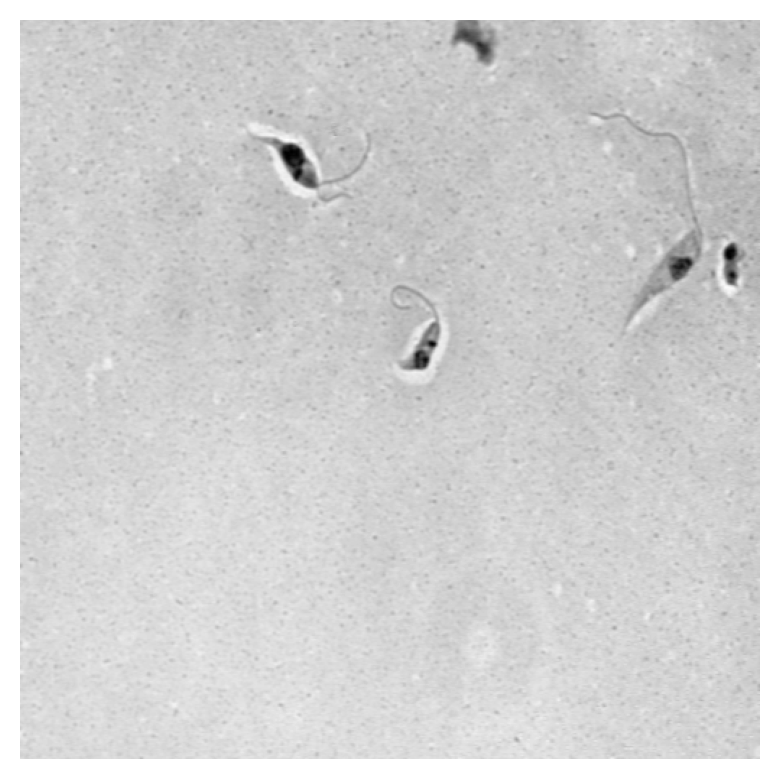

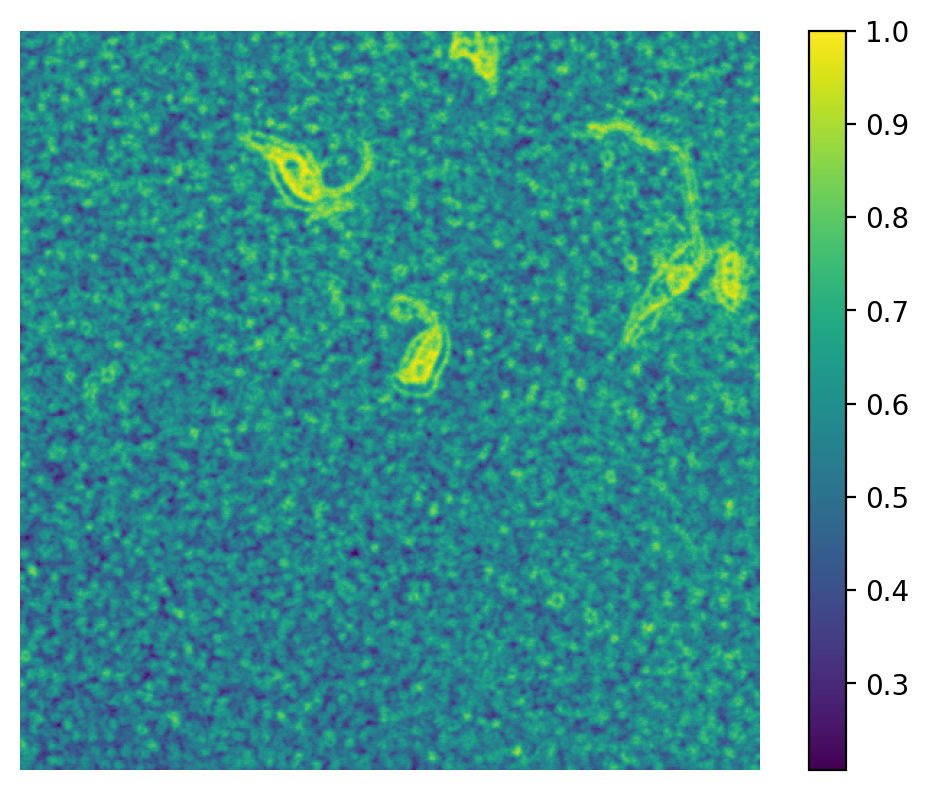

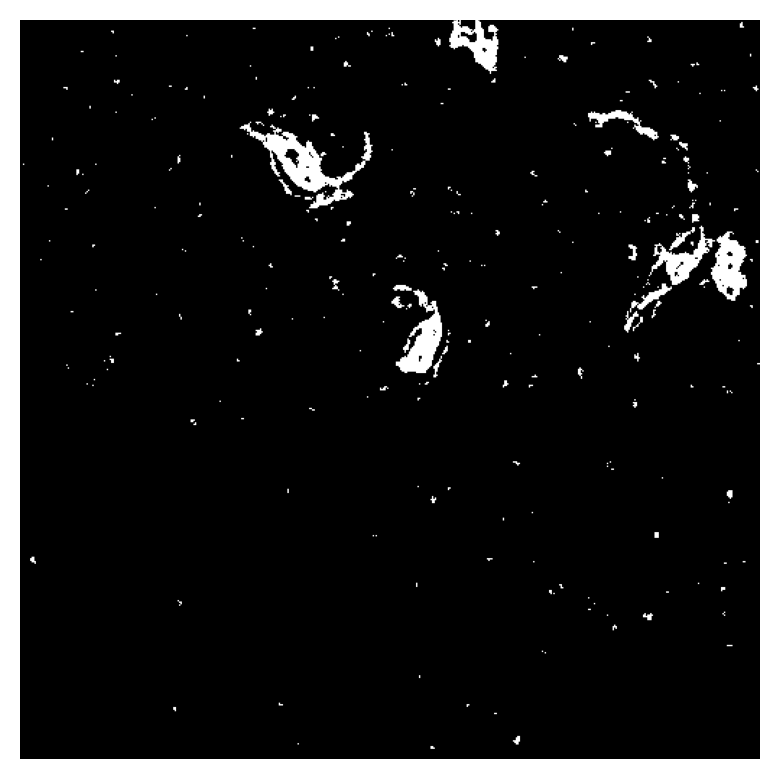

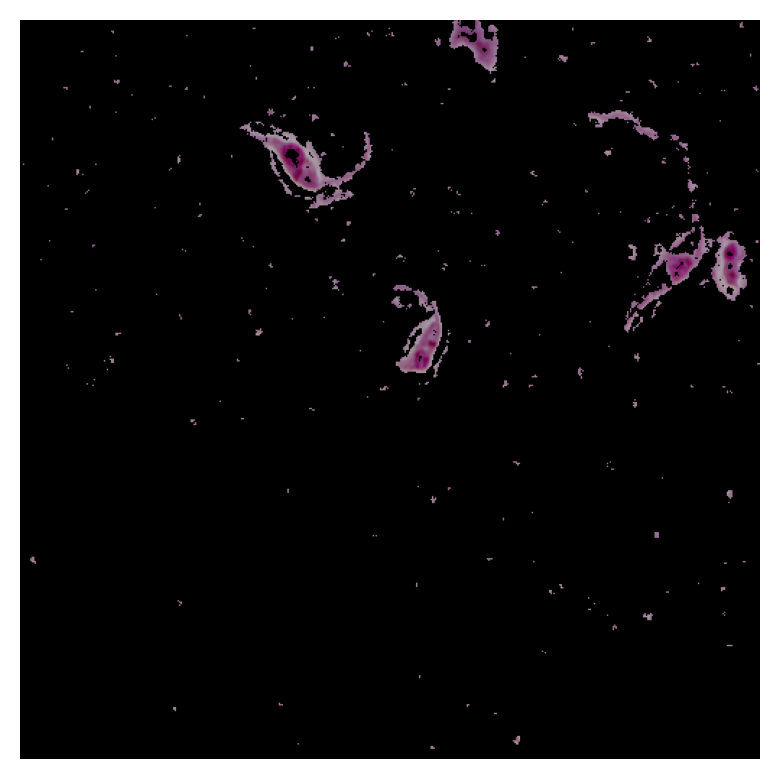

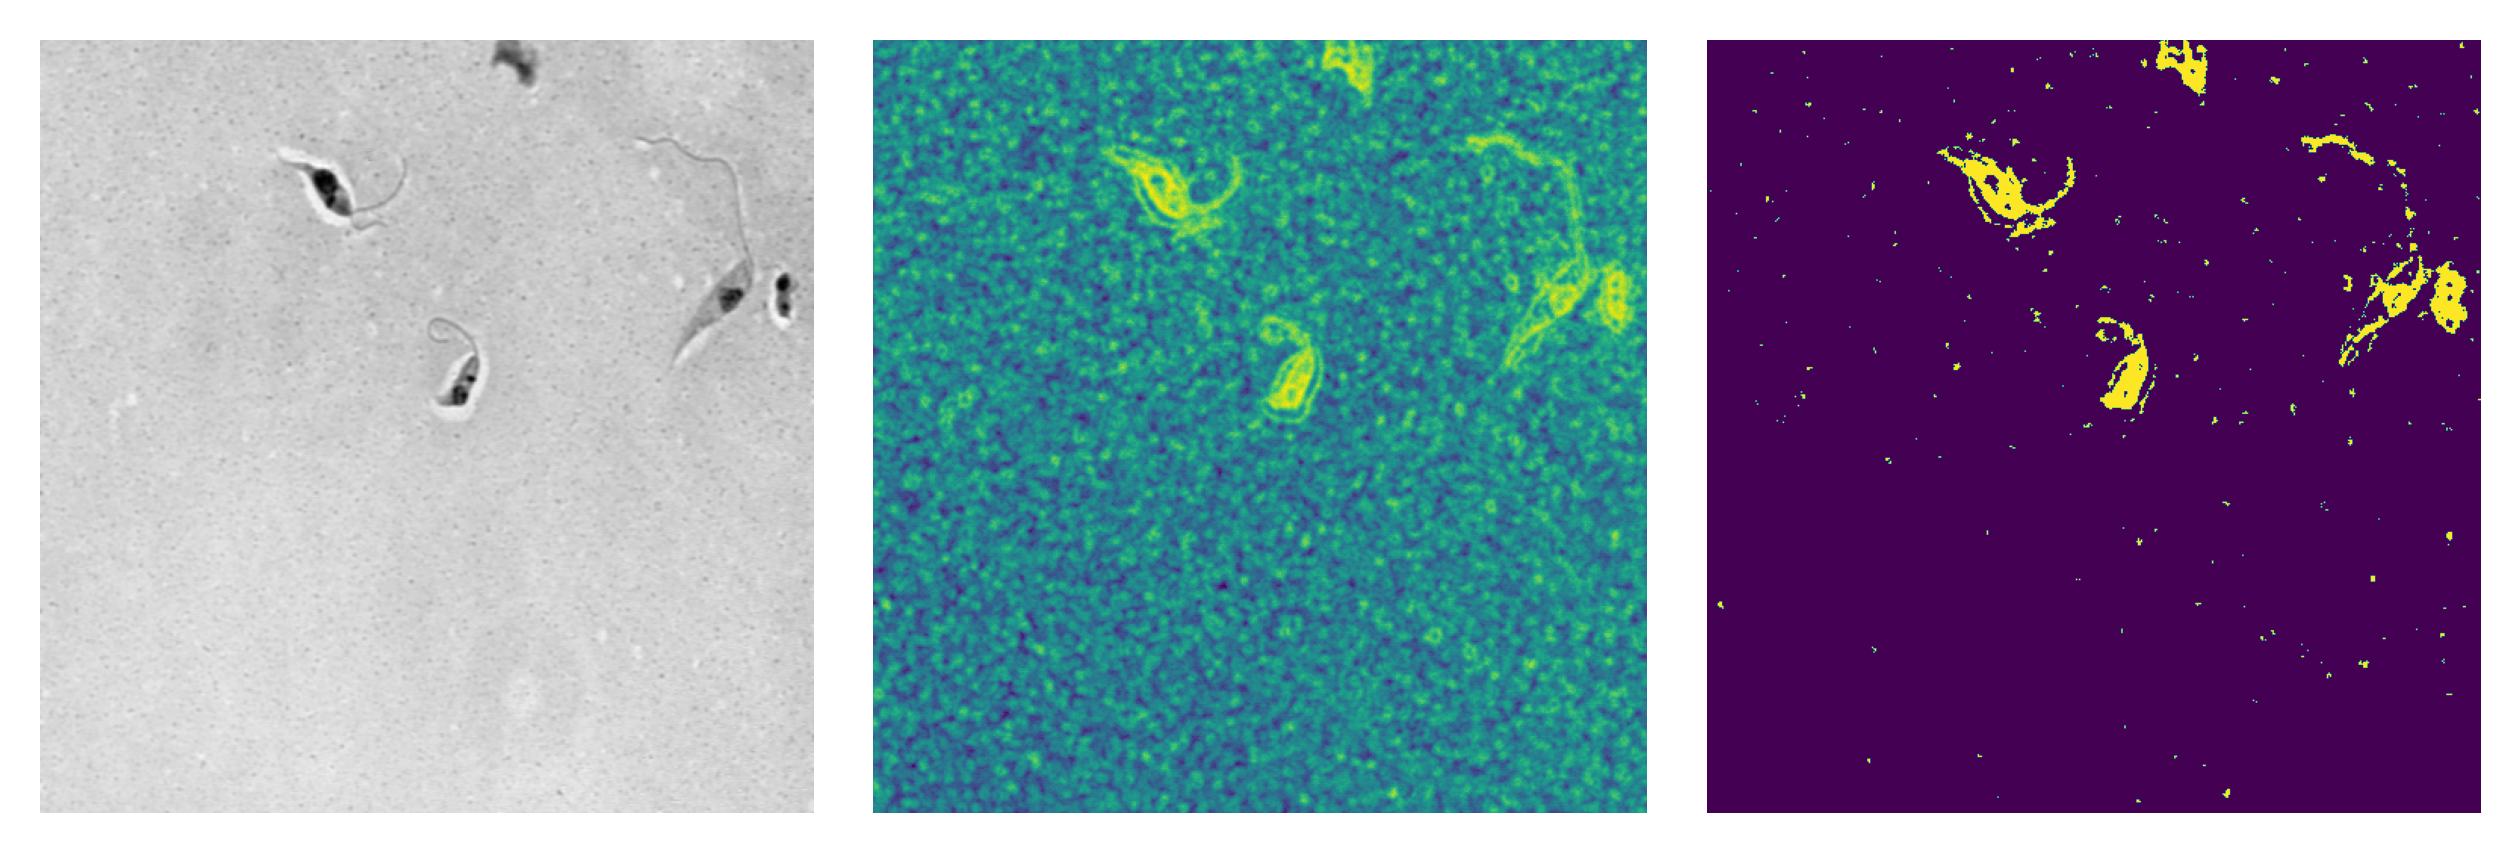

In [14]:
im_dest = f"{zse_path}/notebooks/leishmania/entropy"
img = data_test[-1]["style"].permute(1,2,0).mul(255).byte()
style = rgb2gray(img)
style = img_as_ubyte(gaussian(style, sigma=1, channel_axis=2, preserve_range=True))
entropy_img = entropy(style, disk(r))
entropy_img /= entropy_img.max()
mask = entropy_img > t

plt.figure(dpi=200)
plt.imshow(style, cmap="gray")
plt.axis("off")
plt.savefig(f"{im_dest}/smooth.png", bbox_inches='tight')

plt.figure(dpi=200)
plt.imshow(entropy_img)
plt.axis("off")
plt.colorbar()
plt.savefig(f"{im_dest}/entropy.png", bbox_inches='tight')

plt.figure(dpi=200)
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.savefig(f"{im_dest}/mask.png", bbox_inches='tight')

plt.figure(dpi=200)
plt.imshow(img * mask[...,None], cmap="gray")
plt.axis("off")
plt.savefig(f"{im_dest}/masked_target.png", bbox_inches='tight')


plt.figure(dpi=400)
plt.subplot(1,3,1)
plt.imshow(style, cmap="gray")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(entropy_img)
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(mask)
plt.axis("off")

plt.tight_layout()
plt.show()